Problem Definition :
    Customer churn is when a company’s customers stop doing business with that company.
    Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer 
    churn means "leaving the company" or stop doing business with that company.
    It is very critical for business to have an idea about why and when customers are likely to churn.
    Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company.




In [1]:
#import the required libraries
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
#display the first 5 rows by default
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---From the above observations we can see that the dataset has 7043 rows and 21 columns.
---There are 20 independent(features) and 1 dependent variable(Target) for 7043 customers.
---The target variable indicates whether the customer has left the company(churn=Yes)
---Here the target varable has 2 categories(Yes and No),hence it is Binary classification problem


In [3]:
#Display the bottom 5 rows by default
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.shape # display the number of rows and columns of the dataset

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

From the above observations we can see the columns as follows:
customerID :Customer ID
gender :Gender of customer
SeniorCitizen :Whether the customer is senior citizen or not
Partner:Whether customer has partner or not
Dependents:Whether customer has dependents or not
tenure : number of months the customer has stayed with the company
PhoneService:whether the customer has phone service or not
MultipleLines:whether the customer has multiple lines or not
InternetService:customers internet service provider
OnlineSecurity:whether customer has online security or not
OnlineBackup:whether customer has online backup or not
DeviceProtection :whether customer has device protection or not
TechSupport:whether customer has tech support or not
StreamingTV :whether customer has streaming TV or not
StreamingMovies :whether customer has streaming Movies or not
Contract:the contract term of the customer
PaperlessBilling :whether customer has paperless billing or not
PaymentMethod :the customers payment method
MonthlyCharges:the amount charged to the customer monthly
TotalCharges : the total amount charged to the customer
Churn: whether the customer churned or not

# EDA

In [5]:
#checking for null values in dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From the above result we can see that there are no null values present and hence move forward with the datatypes for all the columns

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


From the above observations we can see that the col 'TotalCharges' datatype is object , but the values are float, hence we need to change the datatype to float using typecasting

In [13]:
df['TotalCharges'].nunique()

6531

In [14]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


---From the above observations we can see that some of the columns for 'TotalCharges' have space as a value, and hence we shall replace it with nan/null values

In [15]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [16]:
#check for null values after replacement
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

-- the above output shows 11 null values , hence use typecasting to convert object to float

In [17]:
df['TotalCharges']=df['TotalCharges'].astype(float)
df.TotalCharges.dtype

dtype('float64')

---the datatype has been changed , now we need to handle the null values, using mean

In [18]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [19]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [20]:
#using fillna() to fill the null values
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

----As our target variabe is 'Churn', we shall check the distribution of data for the balancing the data 

In [23]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the above observations we can see that our data in imbalanced , "No" : is having the count of 5174 and "Yes" :1869,we need to do data balancing for better performance with machine learning models

# Data Distribution

--Let us check the counts for the categorial features to carry out the visualization of data


In [25]:
col=df.columns
bin_cols=[]

for i in col:
    if df[i].value_counts().shape[0]==2:
        bin_cols.append(i)
        
bin_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

--From the above observations we can see that the columns displayed represent the binary categories , which means that the other columns have multiple categories

In [26]:
col=df.columns
mul_cols=[]

for i in col:
    if df[i].value_counts().shape[0]>2:
        mul_cols.append(i)
        
mul_cols

['customerID',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

--------------Distribution of binary categorical features-------------------

Male      3555
Female    3488
Name: gender, dtype: int64


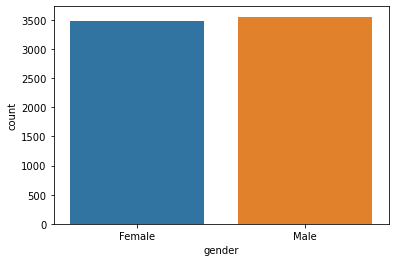

In [27]:
import seaborn as sns
ax=sns.countplot(x='gender',data=df)
print(df['gender'].value_counts())

From the above observations we can see that the total no of male customers is:3555 and female is :3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


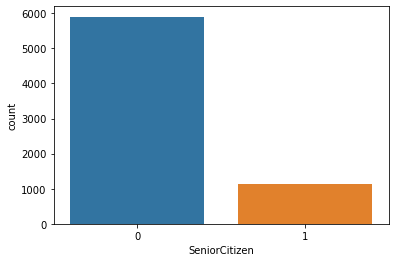

In [28]:
import seaborn as sns
ax=sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

From the above observation we can see that senior citizen customers are very less in number with count:1142, where as young customers are more:5901

No     3641
Yes    3402
Name: Partner, dtype: int64


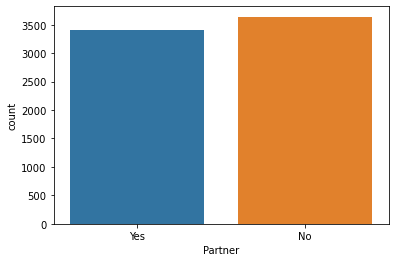

In [29]:
import seaborn as sns
ax=sns.countplot(x='Partner',data=df)
print(df['Partner'].value_counts())

From the above observation we can see that , the customers who have partners and those who dont share same count almost: no-3641 and yes-3402

No     4933
Yes    2110
Name: Dependents, dtype: int64


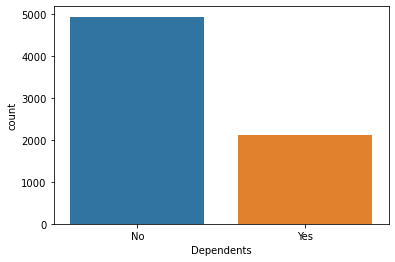

In [30]:
import seaborn as sns
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

From the above observations we can see that the customers who dont have depedents are more in count of :4933 , and those who have dependents are :2110

Yes    6361
No      682
Name: PhoneService, dtype: int64


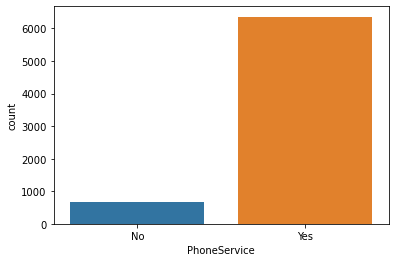

In [31]:
import seaborn as sns
ax=sns.countplot(x='PhoneService',data=df)
print(df['PhoneService'].value_counts())

From the above observation we can see that customers who do not have phone service are very less in count of:682, which shows that maximum customers do have or take the service:6361

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


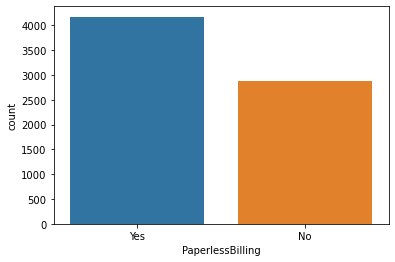

In [32]:
import seaborn as sns
ax=sns.countplot(x='PaperlessBilling',data=df)
print(df['PaperlessBilling'].value_counts())

 From the above observations we can see that customers with paperless bill are:4171 and with paperbill are: 2872

---The highest data imbalance can be seen in PhoneService and SeniorCitizen variables.
---Most of the customers are Young and do have home service
---The target variable 'Churn' has the categories in the form of "yes" and "No", we can replace it to 1 and 0 for better calculations

In [33]:
#replace the target variable categories
ch={'Yes':1,'No':0}
df.Churn.replace(ch,inplace=True)

In [34]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


-----------Other Categorical features----------

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


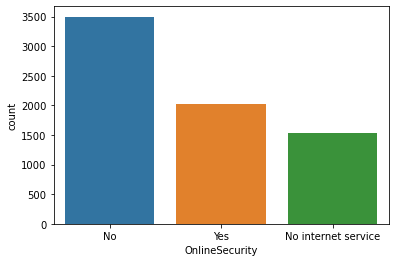

In [35]:
#'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies','InternetService'
ax=sns.countplot(x='OnlineSecurity',data=df)dd
print(df['OnlineSecurity'].value_counts())
 
 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


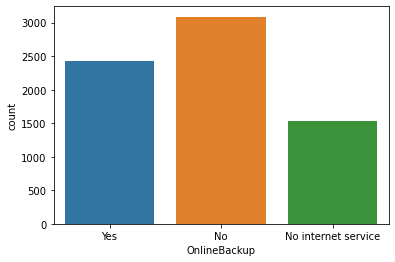

In [36]:
ax=sns.countplot(x='OnlineBackup',data=df)
print(df['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


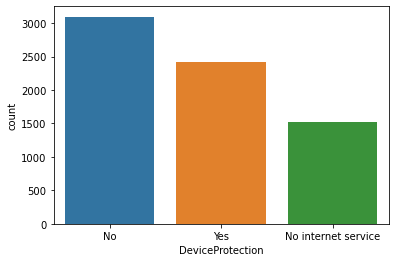

In [37]:
ax=sns.countplot(x='DeviceProtection',data=df)
print(df['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


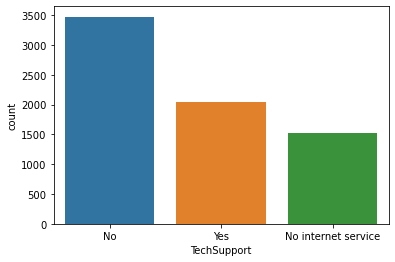

In [38]:
ax=sns.countplot(x='TechSupport',data=df)
print(df['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


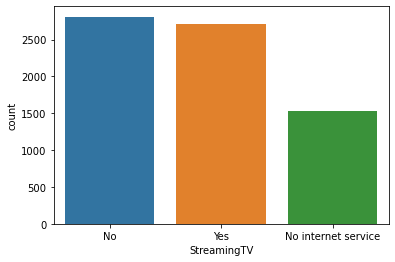

In [39]:
x=sns.countplot(x='StreamingTV',data=df)
print(df['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


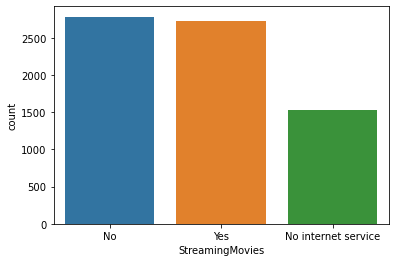

In [40]:
x=sns.countplot(x='StreamingMovies',data=df)
print(df['StreamingMovies'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


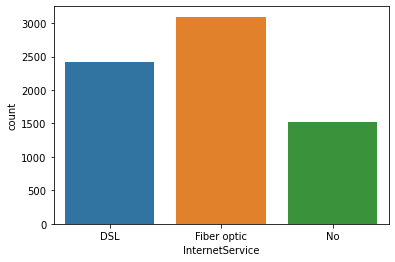

In [41]:
x=sns.countplot(x='InternetService',data=df)
print(df['InternetService'].value_counts())

--From the above observations we can see that If the customer has Inetrnet service , only then he can use 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', the Internet service with highest count is for fiberoptic:3096, and no internet service is :1526

In [42]:
df[['Churn','Contract']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


From the result we can see that customers with long term , do have chances to churn , where as customers with short-term are likely to churn

-----Distribution of continous features----- tenure, monthly charges and total charges


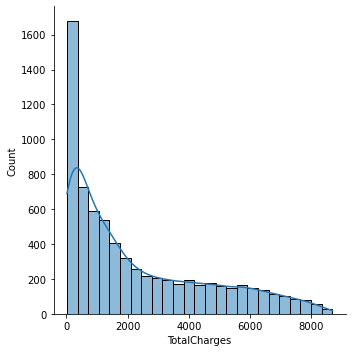

In [43]:
sns.displot(df['TotalCharges'],kde=True)

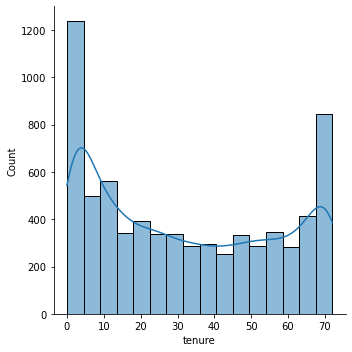

In [44]:
sns.displot(df['tenure'],kde=True)

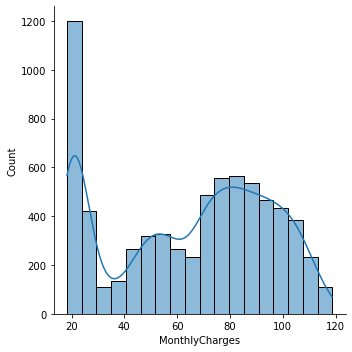

In [45]:
sns.displot(df['MonthlyCharges'],kde=True)

In [46]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


It can be seen that customer with long term relationship stay with the company , where as MonthlyCharges have no effect on churn rate

In [47]:
#--Now contract and tenure features may be correlated , as long term customers do not churn
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


--As expected , we can see that customers with short term are more likely to churn 
--It shows that contract and tenure are highly correlated 
--After the observations, the features that are least important shall we droped

In [48]:
#Drop CustomerID,Contract,Gender,TotalCharges
df.drop(['customerID','gender','Contract','TotalCharges'],axis=1,inplace=True)

In [49]:
df.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1


In [50]:
df.shape

(7043, 17)

# Encoding of data

In [51]:
#Since the  dataset has lot of string values, we will use encoding techniques to convert string data to numeric data
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,0
1,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,56.95,0
2,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,1
3,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,42.30,0
4,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,3.0,84.80,0
7039,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,103.20,0
7040,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,0
7041,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,1


------Correlation with target column

In [52]:
df.corr()['Churn'].sort_values()

tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

-----Skewness

In [53]:
df.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

Form the observations we can see that features are mostly positively corelated 

# Resampling

In [54]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Class distribution before Resampling')

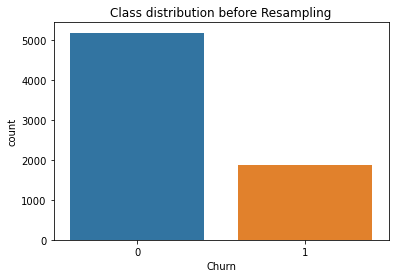

In [56]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot('Churn',data=df).set_title("Class distribution before Resampling")

In [57]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [58]:
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85
1,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,56.95
2,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85
3,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,42.30
4,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,3.0,84.80
7039,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,103.20
7040,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60
7041,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40


In [59]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [60]:
x.shape

(7043, 16)

In [61]:
y.shape

(7043,)

In [62]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [63]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

--From the above result we can see that after applying SMOTE the ratio is 1:1

In [66]:
x.shape

(10348, 16)

In [67]:
y.shape

(10348,)

# ML modeling

Since the outcome 'Churn' has 2 variables , it is a classification problem

In [78]:
#divide the data into train and test subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [79]:
#---Ridge classifier---
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [80]:
#create an object for RidgeClassifier and train the model
cr=RidgeClassifier()
cr.fit(x_train,y_train)

RidgeClassifier()

In [81]:
#make the predictions on training data
pred=cr.predict(x_train)

In [82]:
#accuracy on training data
accuracy_score(y_train,pred)

0.7666102923411452

From the above result we can see that the accuracy obtained is approx 76%


In [83]:
confusion_matrix(y_train,pred)

array([[3085, 1060],
       [ 872, 3261]], dtype=int64)

In [84]:
#make predictions on testing data
pred_test=cr.predict(x_test)

In [85]:
#accuracy on testing data
accuracy_score(y_test,pred_test)

0.7531400966183575

---The model achieved ~75% accuracy on testing data and ~76% accuracy on test data..As there is no much difference , we can asume that there is no overfitting.

----------Random Forest Classifier-------------

In [86]:
from sklearn.ensemble import RandomForestClassifier
cf=RandomForestClassifier(n_estimators=100,max_depth=10)
cf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [87]:
pred=cf.predict(x_train)
accuracy_score(y_train,pred)

0.8951437545300798

In [88]:
confusion_matrix(y_train,pred)

array([[3648,  497],
       [ 371, 3762]], dtype=int64)

In [ ]:
pred_test=cf.predict(x_test)